---
## Step 0: Load The Data

In [102]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [103]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
training_file = './traffic-signs-data/train.p'
validation_file='./traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [104]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
import random
import pandas as pd

# TODO: Number of training examples
n_train = X_train.shape[0]

n_valid= X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = [X_train.shape[1],X_train.shape[2],X_train.shape[3]]

# TODO: How many unique classes/labels there are in the dataset.
def getLabelsCount(labels):
    d = dict(zip(labels, [0] * len(labels)))
    for x in labels:
        d[x] += 1
    return d
signsDicts = getLabelsCount(y_train)
n_classes = len(signsDicts)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = [32, 32, 3]
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

0. Speed limit (20km/h) - Samples: 180


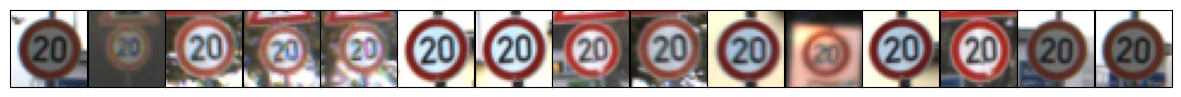

----------------------------------------------------------------------------

1. Speed limit (30km/h) - Samples: 1980


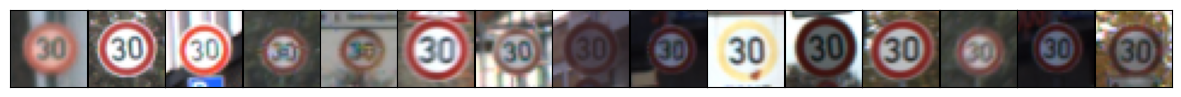

----------------------------------------------------------------------------

2. Speed limit (50km/h) - Samples: 2010


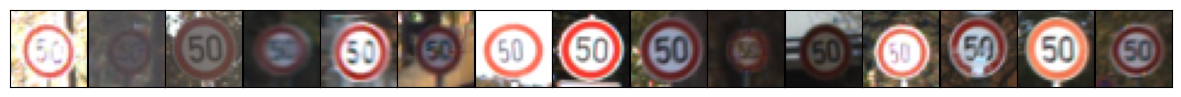

----------------------------------------------------------------------------

3. Speed limit (60km/h) - Samples: 1260


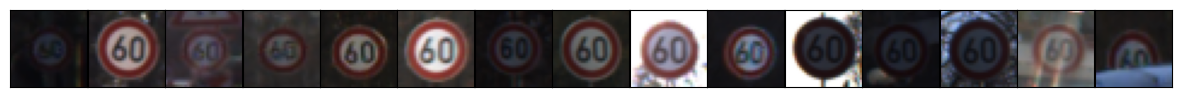

----------------------------------------------------------------------------

4. Speed limit (70km/h) - Samples: 1770


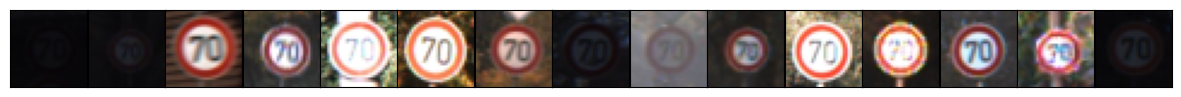

----------------------------------------------------------------------------

5. Speed limit (80km/h) - Samples: 1650


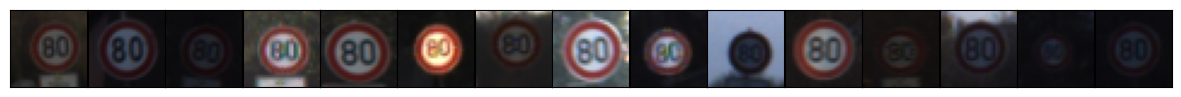

----------------------------------------------------------------------------

6. End of speed limit (80km/h) - Samples: 360


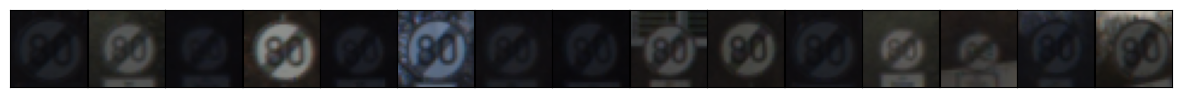

----------------------------------------------------------------------------

7. Speed limit (100km/h) - Samples: 1290


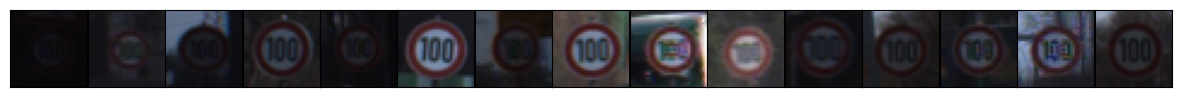

----------------------------------------------------------------------------

8. Speed limit (120km/h) - Samples: 1260


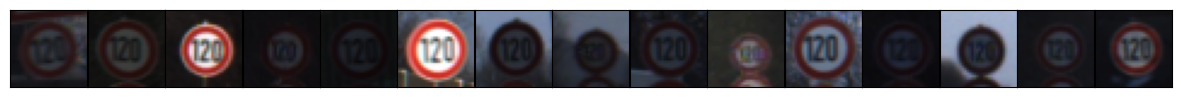

----------------------------------------------------------------------------

9. No passing - Samples: 1320


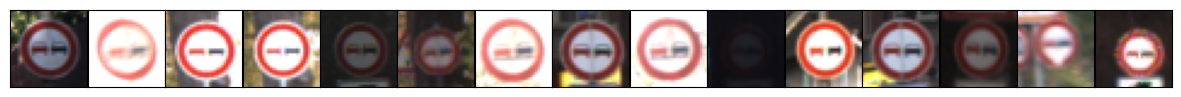

----------------------------------------------------------------------------

10. No passing for vehicles over 3.5 metric tons - Samples: 1800


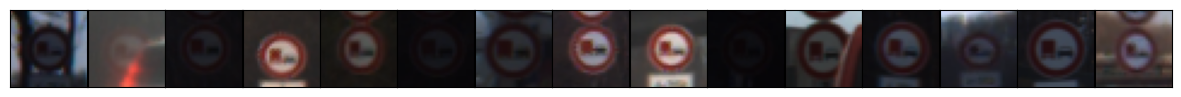

----------------------------------------------------------------------------

11. Right-of-way at the next intersection - Samples: 1170


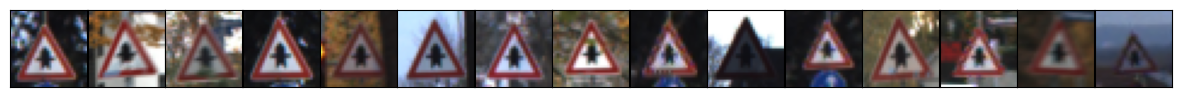

----------------------------------------------------------------------------

12. Priority road - Samples: 1890


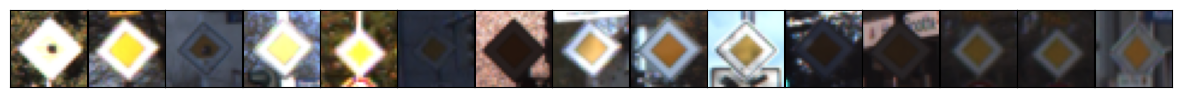

----------------------------------------------------------------------------

13. Yield - Samples: 1920


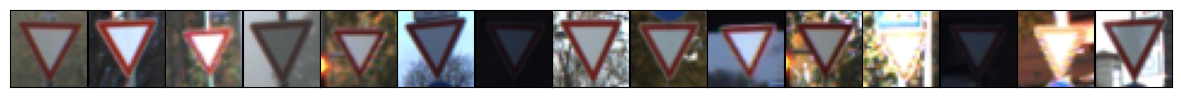

----------------------------------------------------------------------------

14. Stop - Samples: 690


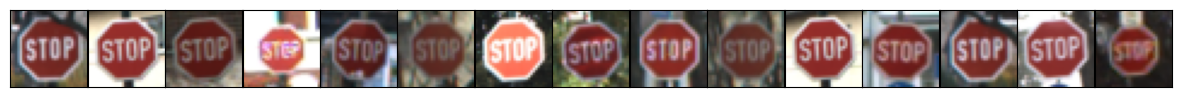

----------------------------------------------------------------------------

15. No vehicles - Samples: 540


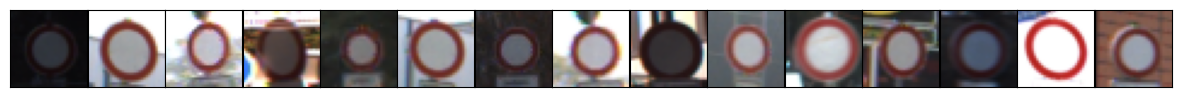

----------------------------------------------------------------------------

16. Vehicles over 3.5 metric tons prohibited - Samples: 360


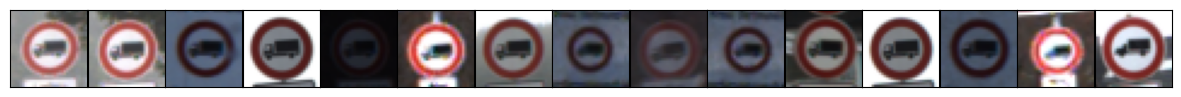

----------------------------------------------------------------------------

17. No entry - Samples: 990


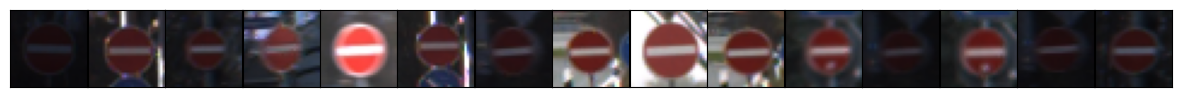

----------------------------------------------------------------------------

18. General caution - Samples: 1080


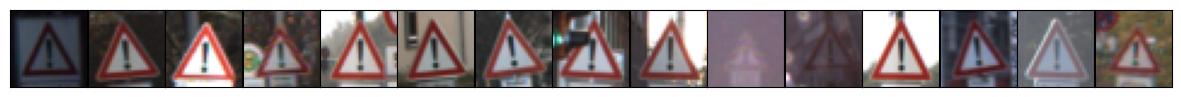

----------------------------------------------------------------------------

19. Dangerous curve to the left - Samples: 180


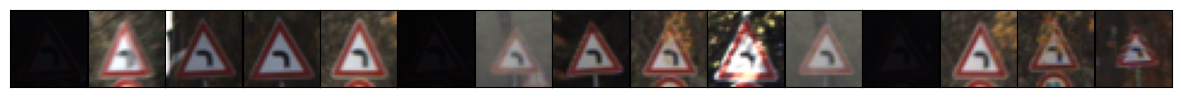

----------------------------------------------------------------------------

20. Dangerous curve to the right - Samples: 300


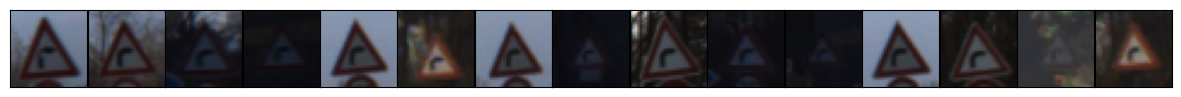

----------------------------------------------------------------------------

21. Double curve - Samples: 270


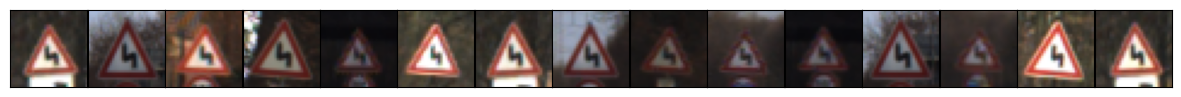

----------------------------------------------------------------------------

22. Bumpy road - Samples: 330


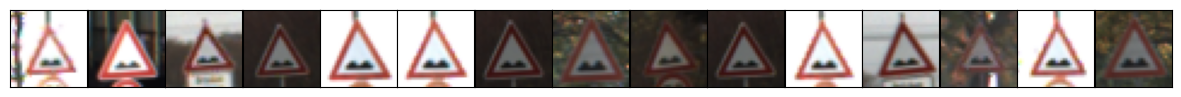

----------------------------------------------------------------------------

23. Slippery road - Samples: 450


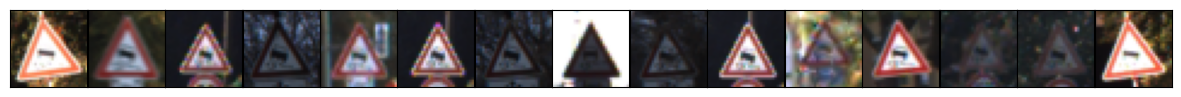

----------------------------------------------------------------------------

24. Road narrows on the right - Samples: 240


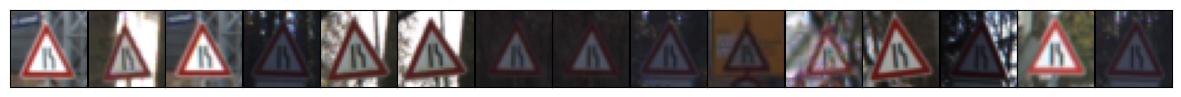

----------------------------------------------------------------------------

25. Road work - Samples: 1350


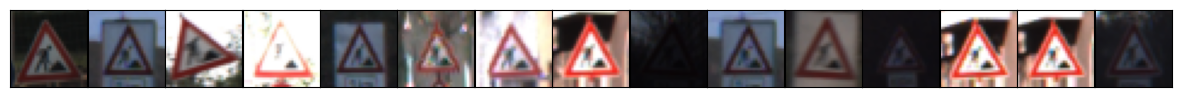

----------------------------------------------------------------------------

26. Traffic signals - Samples: 540


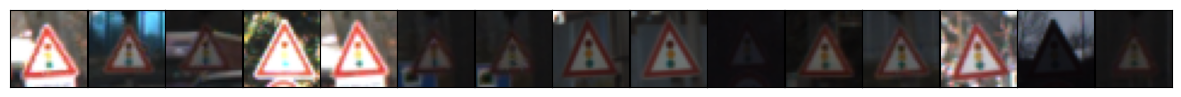

----------------------------------------------------------------------------

27. Pedestrians - Samples: 210


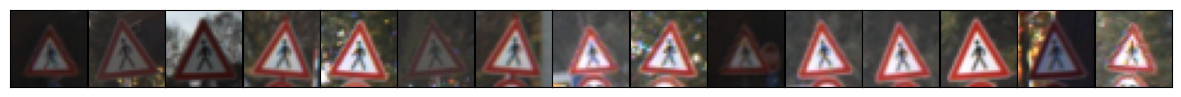

----------------------------------------------------------------------------

28. Children crossing - Samples: 480


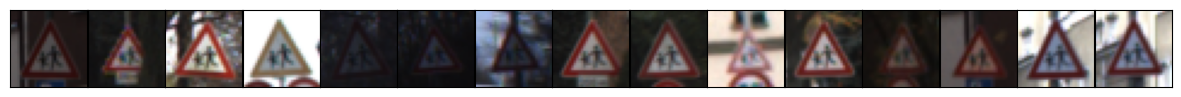

----------------------------------------------------------------------------

29. Bicycles crossing - Samples: 240


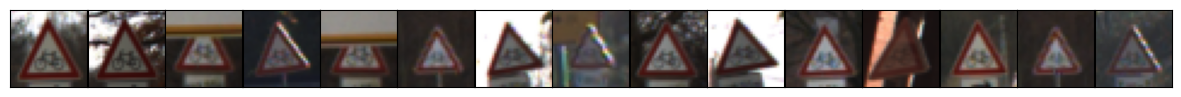

----------------------------------------------------------------------------

30. Beware of ice/snow - Samples: 390


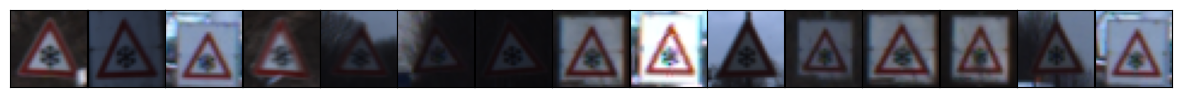

----------------------------------------------------------------------------

31. Wild animals crossing - Samples: 690


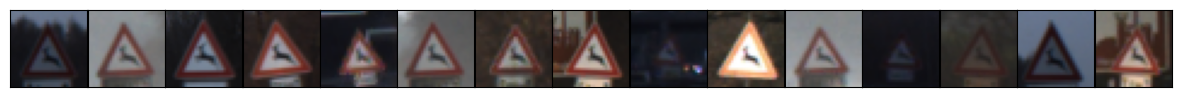

----------------------------------------------------------------------------

32. End of all speed and passing limits - Samples: 210


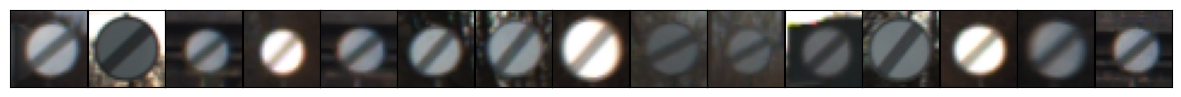

----------------------------------------------------------------------------

33. Turn right ahead - Samples: 599


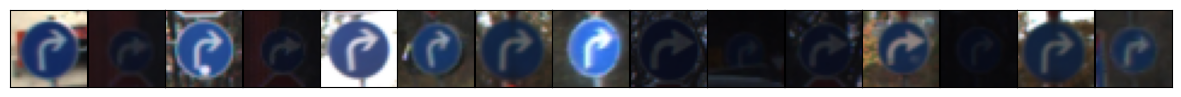

----------------------------------------------------------------------------

34. Turn left ahead - Samples: 360


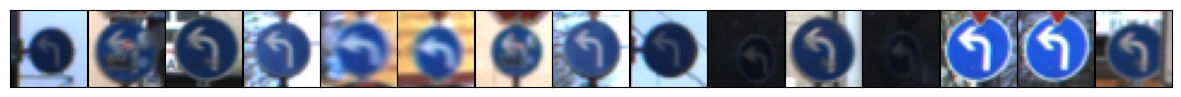

----------------------------------------------------------------------------

35. Ahead only - Samples: 1080


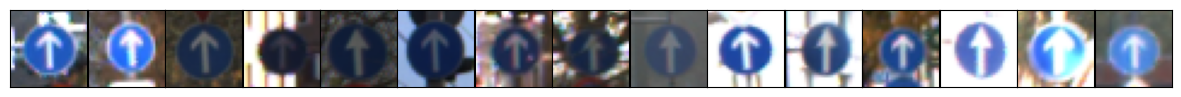

----------------------------------------------------------------------------

36. Go straight or right - Samples: 330


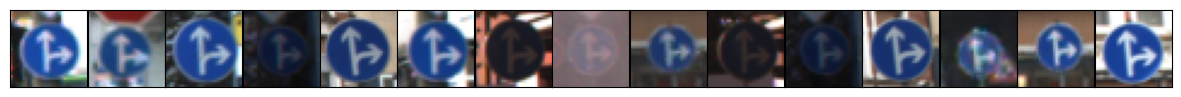

----------------------------------------------------------------------------

37. Go straight or left - Samples: 180


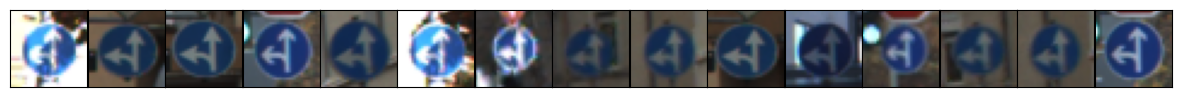

----------------------------------------------------------------------------

38. Keep right - Samples: 1860


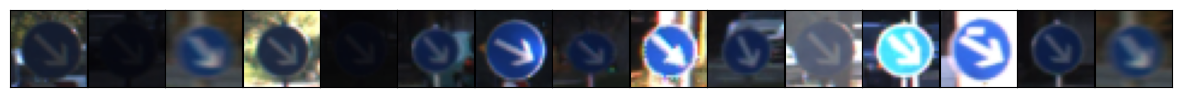

----------------------------------------------------------------------------

39. Keep left - Samples: 270


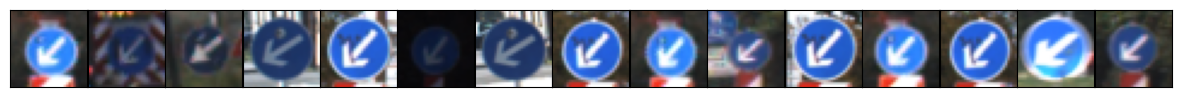

----------------------------------------------------------------------------

40. Roundabout mandatory - Samples: 300


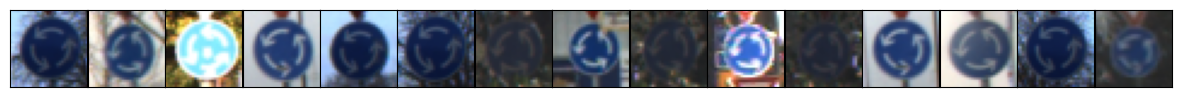

----------------------------------------------------------------------------

41. End of no passing - Samples: 210


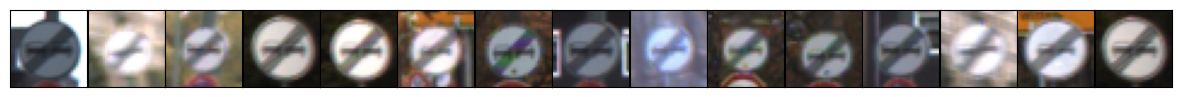

----------------------------------------------------------------------------

42. End of no passing by vehicles over 3.5 metric tons - Samples: 210


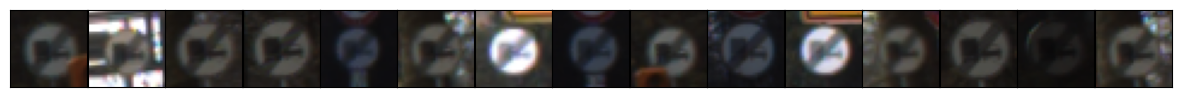

----------------------------------------------------------------------------



In [105]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
# Visualizations will be shown in the notebook.
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2

def getSignNames():
    return pd.read_csv('./signnames.csv').values

def plotImages(X, y, examples_per_sign=15, squeeze=False, cmap=None):
    samples_per_sign = np.bincount(y)
    for sign in getSignNames():
        print("{0}. {1} - Samples: {2}".format(sign[0], sign[1], samples_per_sign[sign[0]]))
        sample_indices = np.where(y==sign[0])[0]
        random_samples = random.sample(list(sample_indices), examples_per_sign)
        fig = plt.figure(figsize = (examples_per_sign, 1))
        fig.subplots_adjust(hspace = 0, wspace = 0)
        for i in range(examples_per_sign):
            image = X[random_samples[i]]
            axis = fig.add_subplot(1,examples_per_sign, i+1, xticks=[], yticks=[])
            if squeeze: image = image.squeeze()
            if cmap == None: axis.imshow(image)
            else: axis.imshow(image.squeeze(), cmap=cmap)
        plt.show()
        print("----------------------------------------------------------------------------\n")

plotImages(X_train, y_train)

## Apply data augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

# Load the image data
train_data = datagen.flow_from_directory('train/', target_size=(224, 224), batch_size=32, class_mode='categorical' ) 

(array([ 180., 1980., 2010., 1260., 1770., 1650.,  360., 1290., 1260.,
        1320., 1800., 1170., 1890., 1920.,  690.,  540.,  360.,  990.,
        1080.,  180.,  300.,  270.,  330.,  450.,  240., 1350.,  540.,
         210.,  480.,  240.,  390.,  690.,  210.,  599.,  360., 1080.,
         330.,  180., 1860.,  270.,  300.,  210.,  210.]),
 array([ 0.        ,  0.97674419,  1.95348837,  2.93023256,  3.90697674,
         4.88372093,  5.86046512,  6.8372093 ,  7.81395349,  8.79069767,
         9.76744186, 10.74418605, 11.72093023, 12.69767442, 13.6744186 ,
        14.65116279, 15.62790698, 16.60465116, 17.58139535, 18.55813953,
        19.53488372, 20.51162791, 21.48837209, 22.46511628, 23.44186047,
        24.41860465, 25.39534884, 26.37209302, 27.34883721, 28.3255814 ,
        29.30232558, 30.27906977, 31.25581395, 32.23255814, 33.20930233,
        34.18604651, 35.1627907 , 36.13953488, 37.11627907, 38.09302326,
        39.06976744, 40.04651163, 41.02325581, 42.        ]),
 <BarContai

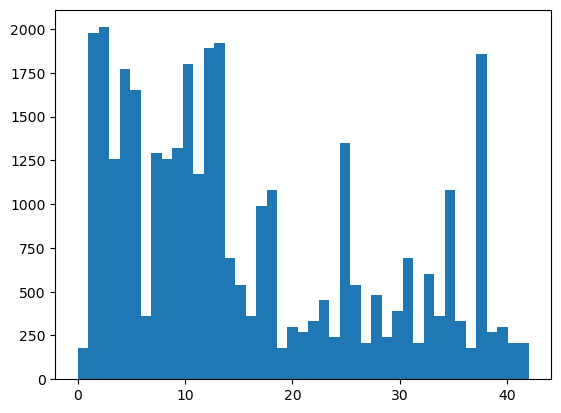

In [106]:
# plot the histogram
plt.hist(y_train, bins=n_classes)


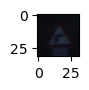

[20 'Dangerous curve to the right']


In [107]:
index = random.randint(3, len(X_train))
X_train_cnt=len(X_train)
image = X_train[index].squeeze()
signNames = getSignNames()
plt.figure(figsize=(1,1))
plt.imshow(image)
plt.tight_layout()
plt.show()
print(signNames[y_train[index]])   

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [116]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import tensorflow as tf
import tensorflow.keras as keras
from keras import datasets, layers, models, utils
print("Tensorflow Version:", tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.config.list_physical_devices('GPU')
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

Tensorflow Version: 2.12.0
Num GPUs Available:  1


In [109]:

# Convert RGB to Grayscale
grayscale_train = tf.image.rgb_to_grayscale(X_train).numpy()
grayscale_valid = tf.image.rgb_to_grayscale(X_valid).numpy()
grayscale_test = tf.image.rgb_to_grayscale(X_test).numpy()

# Append Grayscale to original datasets
X_train_all = np.append(X_train, grayscale_train, axis=3)
X_valid_all = np.append(X_valid, grayscale_valid, axis=3)
X_test_all = np.append(X_test, grayscale_test, axis=3)

# Print shapes
print(X_train_all.shape)
print(X_valid_all.shape)
print(X_test_all.shape)


(34799, 32, 32, 4)
(4410, 32, 32, 4)
(12630, 32, 32, 4)


In [110]:

from keras.utils import to_categorical 
y_train_onehot = to_categorical(y_train, num_classes=43)
y_valid_onehot = to_categorical(y_valid, num_classes=43)

In [111]:

# Convert RGB to Grayscale
grayscale_train = tf.image.rgb_to_grayscale(X_train).numpy()
grayscale_valid = tf.image.rgb_to_grayscale(X_valid).numpy()
grayscale_test = tf.image.rgb_to_grayscale(X_test).numpy()

# Append Grayscale to original datasets
X_train_all = np.append(X_train, grayscale_train, axis=3)
X_valid_all = np.append(X_valid, grayscale_valid, axis=3)
X_test_all = np.append(X_test, grayscale_test, axis=3)

# Print shapes
print(X_train_all.shape)
print(X_valid_all.shape)
print(X_test_all.shape)


(34799, 32, 32, 4)
(4410, 32, 32, 4)
(12630, 32, 32, 4)


### Model Architecture

In [112]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

# Initialize the model
model = Sequential()

# C1 Convolutional Layer 
model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(32,32,4), padding="same"))

# S2 Pooling Layer
model.add(AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

# C3 Convolutional Layer
model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# S4 Pooling Layer
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# Flatten the CNN output to feed it with fully connected layers
model.add(Flatten())

# C5 Fully Connected Convolutional Layer
model.add(Dense(120, activation='tanh'))

# F6 Fully Connected Layer
model.add(Dense(84, activation='tanh'))

# Output Layer with softmax activation
model.add(Dense(43, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [113]:
### Train your model here.
# Train the model and store the history
history = model.fit(X_train_all, y_train_onehot, epochs=10, batch_size=32)


Epoch 1/10
1088/1088 [==============================] - 12s 11ms/step - loss: 0.5360 - accuracy: 0.8692
Epoch 2/10
1088/1088 [==============================] - 11s 10ms/step - loss: 0.1817 - accuracy: 0.9526
Epoch 3/10
1088/1088 [==============================] - 11s 10ms/step - loss: 0.1373 - accuracy: 0.9624
Epoch 4/10
1088/1088 [==============================] - 11s 10ms/step - loss: 0.1240 - accuracy: 0.9645
Epoch 5/10
1088/1088 [==============================] - 11s 10ms/step - loss: 0.1257 - accuracy: 0.9628
Epoch 6/10
1088/1088 [==============================] - 11s 10ms/step - loss: 0.1260 - accuracy: 0.9624
Epoch 7/10
1088/1088 [==============================] - 11s 10ms/step - loss: 0.1171 - accuracy: 0.9650
Epoch 8/10
1088/1088 [==============================] - 11s 10ms/step - loss: 0.1056 - accuracy: 0.9686
Epoch 9/10
1088/1088 [==============================] - 11s 10ms/step - loss: 0.1291 - accuracy: 0.9611
Epoch 10/10
1088/1088 [==============================] - 11s 10m

In [117]:
# Save the model to disk
model.save('lenet.h5')

# Load the model from disk
loaded_model = keras.models.load_model('lenet.h5')

In [114]:
### Calculate and report the accuracy on the training and validation set.
val_loss, val_acc = model.evaluate(X_valid_all, y_valid_onehot)
print("Validation accuracy:", val_acc)



138/138 [==============================] - 1s 7ms/step - loss: 0.3625 - accuracy: 0.9043
Validation accuracy: 0.9043083786964417


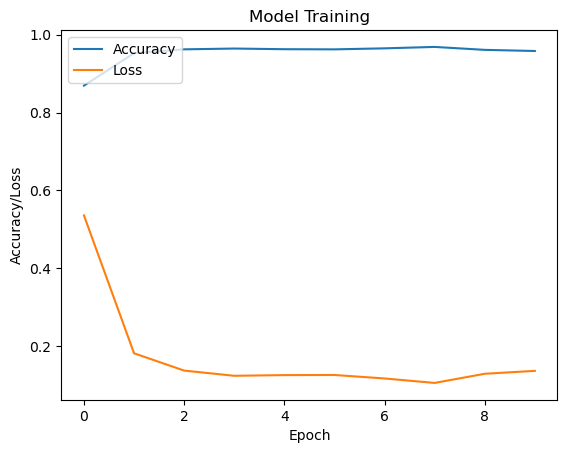

In [115]:
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
# Plot the training accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend(['Accuracy', 'Loss'], loc='upper left')
plt.show()
### Feel free to use as many code cells as needed.

## Transfer learning

In [ ]:
num_classes = 43
# Load the pre-trained model
base_model = keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Add new layers on top of the pre-trained model
x = keras.layers.GlobalAveragePooling2D()(base_model.output)
x = keras.layers.Dense(128, activation='relu')(x)
predictions = keras.layers.Dense(num_classes, activation='softmax')(x)

# Create the new model
model = keras.models.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Fine-tuning a pretrained model

In [ ]:
# Load the pre-trained model
base_model = keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze some of the layers in the pre-trained model
for layer in base_model.layers[:-5]:
    layer.trainable = False

# Add new layers on top of the pre-trained model
x = keras.layers.GlobalAveragePooling2D()(base_model.output)
x = keras.layers.Dense(128, activation='relu')(x)
predictions = keras.layers.Dense(num_classes, activation='softmax')(x)

# Create the new model
model = keras.models.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [71]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


[17 'No entry']
(32, 32, 3)


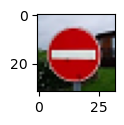

[12 'Priority road']
(32, 32, 3)


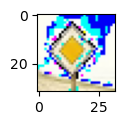

[14 'Stop']
(32, 32, 3)


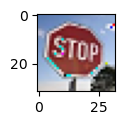

[11 'Right-of-way at the next intersection']
(32, 32, 3)


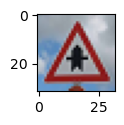

[38 'Keep right']
(32, 32, 3)


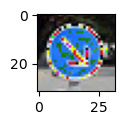

[4 'Speed limit (70km/h)']
(32, 32, 3)


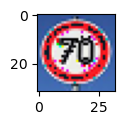

[35 'Ahead only']
(32, 32, 3)


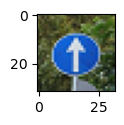

[33 'Turn right ahead']
(32, 32, 3)


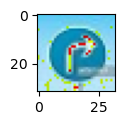

[25 'Road work']
(32, 32, 3)


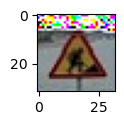

[13 'Yield']
(32, 32, 3)


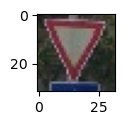

In [121]:
# Import the image processing module from matplotlib
import matplotlib.image as mpimg

# Import the numerical processing library numpy
import numpy as np

# Set the number of images to be processed
NImages = 10

# Initialize an array to store the image data. The shape is set to accommodate 
# the number of images, the size of each image (32x32 pixels), and the number of color channels (3 for RGB).
X_real = np.zeros((NImages,32,32,3)).astype(np.uint8)

# Initialize an array to store the labels for the images
y_real = np.array([17,12,14,11,38,4,35,33,25,13])

# Loop over each image
for i in range(NImages):
    # Read the image file using matplotlib's image reading function
    image = mpimg.imread('./testImages/'+str(i+1)+'.png')

    # Scale the image data by 256 and keep only the RGB channels
    # The .astype(np.uint8) converts the data to 8-bit unsigned integers
    image = np.multiply(image,256).astype(np.uint8)[:,:,0:3]

    # Store the processed image data in the X_real array
    X_real[i] = image

    # Print the name of the sign corresponding to the label in the y_real array
    print(signNames[y_real[i]])

    # Print the shape of the processed image data
    print(X_real[i].shape)

    # Create a new figure with size 1x1 inches
    plt.figure(figsize=(1,1))

    # Display the image using matplotlib's imshow function
    plt.imshow(X_real[i],aspect='auto')

    # Show the plotted image
    plt.show()


### Predict the Sign Type for Each Image

In [73]:
### Run the predictions here and use the model to output the prediction for each image.

### Make sure to pre-process the images with the same pre-processing pipeline used earlier.

### Feel free to use as many code cells as needed.
# Write a function that calculates softmax probabilities
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)



### Analyze Performance

In [74]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.